In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os, sys
import re
import collections
import ast

In [2]:
#pool_results_folder = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"
pool_results_folder = "/g/korbel2/weber/MosaiCatcher_files/DEMULTIPLEXING_POOLS/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"

In [3]:
ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
ldir = sorted([e for e in os.listdir(pool_results_folder) if e.startswith("20") and e != "2022-11-15-H33JMAFX5--HGSVCpool1xulOPxmanual"])
print(len(ldir))
ldir

21


['2021-07-29-HWYJ2AFX2--HGSVCxpool1x01',
 '2021-08-03-H22VWAFX3--HGSVCxpool2x02',
 '2021-08-03-H22VWAFX3--HGSVCxpool3x01',
 '2022-11-15-H33JMAFX5--HGSVCpool1xulOPxEcho',
 '2022-11-25-H37MNAFX5--HGSVCpool1quadrant2KAPA',
 '2023-02-08-HCN3VAFX5--HGSVCpool2',
 '2023-02-08-HCN3VAFX5--HGSVCpool2iTRUE5',
 '2023-03-08-HCNGHAFX5--HGSVCpool2OPSfromFrozen2ul',
 '2023-03-08-HCNGHAFX5--HGSVCpool2inWell2ul',
 '2023-03-08-HCNGHAFX5--HGSVCpool2inWell5ul',
 '2023-04-21-HGF2CAFX5--LanexHGSVCpool2500nlEcho',
 '2023-04-26-HCMMNAFX5--HGSVCpool2OPS500nl',
 '2023-04-26-HCMMNAFX5--HGSVCpool2iinWell2ulLS',
 '2023-06-23-HGFLGAFX5--HGSVCpool3UVled',
 '2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW',
 '2023-11-09-HW5NFAFX5--HGSVCpool1NEW',
 '2023-11-27-HNKL2AFX5--HGSVCpool3NEW',
 '2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96wellUVLED',
 '2024-01-30-AACT75KM5--HGSVCpool1NEWp2',
 '2024-01-30-AACT75KM5--HGSVCpool3NEWp2',
 '2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED']

In [4]:
p = re.compile('.*(pool[1-3]).*')
#ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
d = collections.defaultdict(list)
for e in ldir:
    pool = p.match(e).group(1)
    var = "NEW" if "NEW" in e else "OLD"
    d[f"{pool}_{var}"].append(e)
d

defaultdict(list,
            {'pool1_OLD': ['2021-07-29-HWYJ2AFX2--HGSVCxpool1x01',
              '2022-11-15-H33JMAFX5--HGSVCpool1xulOPxEcho',
              '2022-11-25-H37MNAFX5--HGSVCpool1quadrant2KAPA'],
             'pool2_OLD': ['2021-08-03-H22VWAFX3--HGSVCxpool2x02',
              '2023-02-08-HCN3VAFX5--HGSVCpool2',
              '2023-02-08-HCN3VAFX5--HGSVCpool2iTRUE5',
              '2023-03-08-HCNGHAFX5--HGSVCpool2OPSfromFrozen2ul',
              '2023-03-08-HCNGHAFX5--HGSVCpool2inWell2ul',
              '2023-03-08-HCNGHAFX5--HGSVCpool2inWell5ul',
              '2023-04-21-HGF2CAFX5--LanexHGSVCpool2500nlEcho',
              '2023-04-26-HCMMNAFX5--HGSVCpool2OPS500nl',
              '2023-04-26-HCMMNAFX5--HGSVCpool2iinWell2ulLS'],
             'pool3_OLD': ['2021-08-03-H22VWAFX3--HGSVCxpool3x01',
              '2023-06-23-HGFLGAFX5--HGSVCpool3UVled'],
             'pool2_NEW': ['2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW',
              '2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW

In [5]:
p = re.compile('.*(pool[1-3]).*')
#ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
d_tmp = collections.defaultdict()
for e in ldir:
    pool = p.match(e).group(1)
    var = "NEW" if "NEW" in e else "OLD"
    d_tmp[e.split("--")[1]] = f"{pool}_{var}"
d_tmp

defaultdict(None,
            {'HGSVCxpool1x01': 'pool1_OLD',
             'HGSVCxpool2x02': 'pool2_OLD',
             'HGSVCxpool3x01': 'pool3_OLD',
             'HGSVCpool1xulOPxEcho': 'pool1_OLD',
             'HGSVCpool1quadrant2KAPA': 'pool1_OLD',
             'HGSVCpool2': 'pool2_OLD',
             'HGSVCpool2iTRUE5': 'pool2_OLD',
             'HGSVCpool2OPSfromFrozen2ul': 'pool2_OLD',
             'HGSVCpool2inWell2ul': 'pool2_OLD',
             'HGSVCpool2inWell5ul': 'pool2_OLD',
             'LanexHGSVCpool2500nlEcho': 'pool2_OLD',
             'HGSVCpool2OPS500nl': 'pool2_OLD',
             'HGSVCpool2iinWell2ulLS': 'pool2_OLD',
             'HGSVCpool3UVled': 'pool3_OLD',
             'LanexHGSVCpool2NEW': 'pool2_NEW',
             'HGSVCpool1NEW': 'pool1_NEW',
             'HGSVCpool3NEW': 'pool3_NEW',
             'LanexHGSVCpool2NEW96wellUVLED': 'pool2_NEW',
             'HGSVCpool1NEWp2': 'pool1_NEW',
             'HGSVCpool3NEWp2': 'pool3_NEW',
             'HGSVCpool2N

In [6]:
k = "pool2_OLD"

In [7]:
# Parameters
k = "pool3_OLD"


In [8]:
#output_dir = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/FINAL_RESULTS/cross_analysis"
output_dir = "/g/korbel2/weber/MosaiCatcher_files/DEMULTIPLEXING_POOLS/DEMULTIPLEXING_POOLS/FINAL_RESULTS/cross_analysis"

In [9]:
os.makedirs(f"{output_dir}/{k}", exist_ok=True)

In [10]:
pool_list = list()
#k = "pool1_OLD"


for e in d[k]:
    tmp_df = pd.read_csv(f"{pool_results_folder}/{e}/cell_count_by_sample_and_superpop_DATA.csv", sep="\t")
    tmp_df["PoolID"] = k
    tmp_df["PoolDataset"] = e
    pool_list.append(tmp_df)
df = pd.concat(pool_list)

# Find all unique Superpopulations and Datasets
unique_superpopulations = df['Superpopulation'].unique()
unique_datasets = df['PoolDataset'].unique()

# Generate a list of colors and hatches
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]
hatch_patterns = ["", "///", "***", "---", "ooo", "OOO", "+++", "\\\\\\", "|||"]

# Create a color dictionary and a hatch dictionary
color_dict = dict(zip(unique_superpopulations, colors))
hatch_dict = dict(zip(unique_datasets, hatch_patterns))

# Add a color and hatch column to the dataframe based on 'Superpopulation' and 'Dataset'
#df['color'] = df['Superpopulation'].map(color_dict)
df['hatch'] = df['PoolDataset'].map(hatch_dict)
df.loc[df["SampleID"] == "HG04115", "color"] = "(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)"

df['color'] = df['color'].apply(ast.literal_eval)

# Sort df if necessary
df = df.sort_values(by=["Superpopulation", "SampleID"])

df.to_csv(f"{output_dir}/{k}/{k}_data.tsv", index=False, sep="\t")

df

,Superpopulation,SampleID,cell,color,PoolID,PoolDataset,hatch
0,AFR,HG01887,11,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
0,AFR,HG01887,12,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
1,AFR,HG01897,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
1,AFR,HG01897,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
2,AFR,HG02809,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
2,AFR,HG02809,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
3,AFR,HG03035,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
3,AFR,HG03035,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
4,AFR,HG03200,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
4,AFR,HG03200,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///


In [11]:
df.loc[df["SampleID"] == "HG02148"].cell.sum()

0

In [12]:
df.shape

(57, 7)

In [13]:
unique_superpopulations

array(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'], dtype=object)

In [14]:
df.SampleID.nunique()

32

In [15]:
import yaml
file_path = "pools_composition.yaml"
reference_sample_list = yaml.safe_load(open(file_path, "r"))

In [16]:
d_tmp

defaultdict(None,
            {'HGSVCxpool1x01': 'pool1_OLD',
             'HGSVCxpool2x02': 'pool2_OLD',
             'HGSVCxpool3x01': 'pool3_OLD',
             'HGSVCpool1xulOPxEcho': 'pool1_OLD',
             'HGSVCpool1quadrant2KAPA': 'pool1_OLD',
             'HGSVCpool2': 'pool2_OLD',
             'HGSVCpool2iTRUE5': 'pool2_OLD',
             'HGSVCpool2OPSfromFrozen2ul': 'pool2_OLD',
             'HGSVCpool2inWell2ul': 'pool2_OLD',
             'HGSVCpool2inWell5ul': 'pool2_OLD',
             'LanexHGSVCpool2500nlEcho': 'pool2_OLD',
             'HGSVCpool2OPS500nl': 'pool2_OLD',
             'HGSVCpool2iinWell2ulLS': 'pool2_OLD',
             'HGSVCpool3UVled': 'pool3_OLD',
             'LanexHGSVCpool2NEW': 'pool2_NEW',
             'HGSVCpool1NEW': 'pool1_NEW',
             'HGSVCpool3NEW': 'pool3_NEW',
             'LanexHGSVCpool2NEW96wellUVLED': 'pool2_NEW',
             'HGSVCpool1NEWp2': 'pool1_NEW',
             'HGSVCpool3NEWp2': 'pool3_NEW',
             'HGSVCpool2N

In [17]:
#tmp_l = list()
#for j, row in df.loc[df["PoolID"].str.contains("NEW")].iterrows():
#    #pool_name_reformat = row["PoolDataset"].split("--")[1].replace("_", "").replace("OLD", "")
#    for k,v in reference_sample_list.items():
#        if not "NEW" in k:
#            for s in v:
#                if row["SampleID"] == s:
#
#                    tmp_l.append(row["SampleID"])
#set(tmp_l)

32


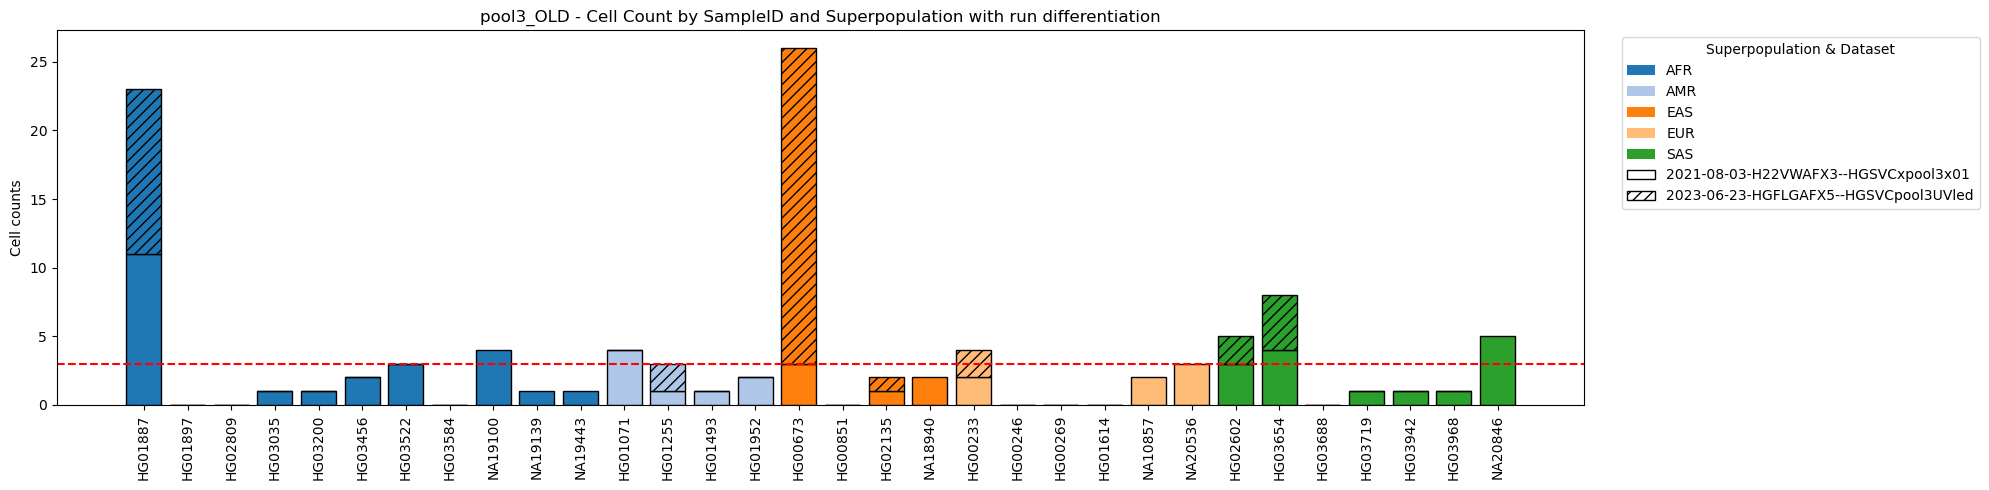

In [18]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import pandas as pd

# Ensure to replace this with the actual DataFrame you are working with
# df = pd.read_csv("your_data.csv")

plt.figure(figsize=(20,5))

ax = plt.gca()  # Get the current axes instance

# Ensure the axes background is white
ax.set_facecolor('white')

# Optionally, ensure the figure background is white
plt.gcf().set_facecolor('white')

# Create a set to keep track of labels already added to the legend
seen_labels = set()

# Assuming 'Dataset' column exists and is used for hatches. If not, adjust as needed.

#df = df.loc[df["PoolID"].str.contains("NEW")]
df = df.sort_values(by=["Superpopulation", "SampleID"])

datasets = df['PoolDataset'].unique()
hatch_patterns = ["", '///', '----', 'o', "*", "xxx", "/", "-", "ooo"]
hatch_dict = dict(zip(datasets, hatch_patterns[:len(datasets)]))

# Unique superpopulations and corresponding colors
unique_superpopulations = df['Superpopulation'].unique()
color_dict = dict(zip(unique_superpopulations, plt.cm.tab20.colors[:len(unique_superpopulations)]))

print(df.SampleID.nunique())

# Dictionary to keep track of the cumulative height for each SampleID
cumulative_heights = {sample_id: 0 for sample_id in df['SampleID'].unique()}

# Plot each bar with its corresponding color and hatch
for (i, row) in df.iterrows():
    label = row['Superpopulation'] if row['Superpopulation'] not in seen_labels else ""
    hatch = hatch_dict.get(row['PoolDataset'], '')  # Get the hatch pattern for the dataset
    
    # Plot bar with stacking
    bottom_value = cumulative_heights[row['SampleID']]
    ax.bar(row['SampleID'], row['cell'], color=color_dict[row['Superpopulation']], hatch=hatch, edgecolor="black", label=label, bottom=bottom_value)
    
    # Update the cumulative height for the SampleID
    cumulative_heights[row['SampleID']] += row['cell']
    
    seen_labels.add(row['Superpopulation'])

# Custom legend for superpopulations
legend_elements_superpop = [Patch(facecolor=color_dict[sp], label=sp) for sp in unique_superpopulations]

# Custom legend for datasets using hatches
legend_elements_dataset = [Patch(facecolor='white', edgecolor='black', hatch=hatch_dict[ds], label=f"{ds}") for ds in datasets]

# Combine the legends
plt.axhline(3, color="red", ls="--")
plt.legend(handles=legend_elements_superpop + legend_elements_dataset, title='Superpopulation & Dataset', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=90)
plt.ylabel('Cell counts')
plt.title(f'{k} - Cell Count by SampleID and Superpopulation with run differentiation')
plt.tight_layout()
plt.savefig(f"{output_dir}/{k}/cell_count_by_sample_and_superpop.png")

plt.show()


In [19]:
df

,Superpopulation,SampleID,cell,color,PoolID,PoolDataset,hatch
0,AFR,HG01887,11,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
0,AFR,HG01887,12,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
1,AFR,HG01897,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
1,AFR,HG01897,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
2,AFR,HG02809,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
2,AFR,HG02809,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
3,AFR,HG03035,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
3,AFR,HG03035,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
4,AFR,HG03200,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
4,AFR,HG03200,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///


In [20]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,HG00101,0,0,1,GBR,EUR


In [21]:
import yaml
file_path = "pools_composition.yaml"
reference_sample_list = yaml.safe_load(open(file_path, "r"))

In [22]:
reference_sample_list.keys()

dict_keys(['pool1NEW', 'pool2NEW', 'pool3NEW', 'pool1', 'pool2', 'pool3'])

In [23]:
k.replace("_OLD", "")

'pool3'

In [24]:

reference_samples_with_metadata = pd.merge(
    pd.DataFrame([e.replace("GM", "NA") for e in reference_sample_list[k.replace("_", "").replace("OLD", "")]], columns=[k]).melt().rename(columns={"variable":"Pool", "value":"SampleID"}),
    metadata
)
reference_samples_with_metadata

,Pool,SampleID,FamilyID,FatherID,MotherID,Sex,Population,Superpopulation
0,pool3_OLD,NA19139,Y043,NA19138,NA19137,1,YRI,AFR
1,pool3_OLD,NA19100,Y105,NA19098,NA19099,2,YRI,AFR
2,pool3_OLD,HG01897,BB07,HG02013,HG01896,1,ACB,AFR
3,pool3_OLD,HG01887,BB04,HG02014,HG01886,1,ACB,AFR
4,pool3_OLD,NA19702,2367,NA19700,NA19701,1,ASW,AFR
5,pool3_OLD,NA20358,2494,NA20356,NA20357,1,ASW,AFR
6,pool3_OLD,HG03942,BD42,HG03941,HG03940,1,BEB,SAS
7,pool3_OLD,NA10857,1346,NA12043,NA12044,1,CEU,EUR
8,pool3_OLD,NA10831,1408,NA12155,NA12156,2,CEU,EUR
9,pool3_OLD,HG00673,SH079,HG00671,HG00672,1,CHS,EAS


In [25]:
df

,Superpopulation,SampleID,cell,color,PoolID,PoolDataset,hatch
0,AFR,HG01887,11,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
0,AFR,HG01887,12,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
1,AFR,HG01897,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
1,AFR,HG01897,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
2,AFR,HG02809,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
2,AFR,HG02809,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
3,AFR,HG03035,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
3,AFR,HG03035,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///
4,AFR,HG03200,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2021-08-03-H22VWAFX3--HGSVCxpool3x01,
4,AFR,HG03200,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool3_OLD,2023-06-23-HGFLGAFX5--HGSVCpool3UVled,///


/tmp/ipykernel_3576629/2994341156.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')


/tmp/ipykernel_3576629/2994341156.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.loc[df["cell"] > 0].groupby("Superpopulation")["SampleID"].nunique().reset_index(), x="Superpopulation", y="SampleID", palette=palette)


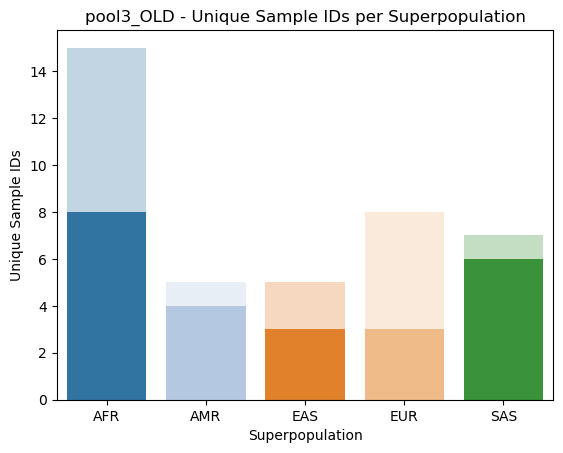

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merge_melt_pivot_table_stats_zscore is your DataFrame
grouped_data = df.groupby("Superpopulation")["SampleID"].nunique().reset_index()

# Unique superpopulations for color mapping
unique_superpopulations = grouped_data['Superpopulation'].unique()

# Generate a list of colors
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Create a color palette that Seaborn can use
palette = [color_dict[sp] for sp in grouped_data['Superpopulation']]


# Plot expected counts (background bars)
sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')


df.to_csv(f"{output_dir}/{k}/sample_by_superpop_recalled_DATA_background.csv", index=False, sep="\t")


# Plot
sns.barplot(data=df.loc[df["cell"] > 0].groupby("Superpopulation")["SampleID"].nunique().reset_index(), x="Superpopulation", y="SampleID", palette=palette)

ax = plt.gca()  # Get the current axes instance

# Ensure the axes background is white
ax.set_facecolor('white')

# Optionally, ensure the figure background is white
plt.gcf().set_facecolor('white')


plt.xlabel('Superpopulation')
plt.ylabel('Unique Sample IDs')
plt.title(f'{k} - Unique Sample IDs per Superpopulation')
plt.savefig(f"{output_dir}/{k}/sample_by_superpop_recalled.png")

plt.show()


In [27]:
import pandas as pd

pool_list = list()
#k = "pool1_OLD"
for e in d[k]:
    tmp_df = pd.read_csv(f"{pool_results_folder}/{e}/pivot_table_zscore_norm.tsv.gz", 
                 sep="\t", header=None, compression="gzip")
    #    tmp_df["PoolID"] = e.split("--")[1]
    # Set the first column as the index
    tmp_df.set_index(0, inplace=True)

    # Create a MultiIndex for the columns using the first two rows
    # The first row becomes the top level of the MultiIndex, and the second row becomes the second level
#    multi_index = pd.MultiIndex.from_arrays([tmp_df.iloc[0], tmp_df.iloc[1]])

    tmp_df.columns = tmp_df.iloc[1]
    
    # Drop the first two rows that were used to create the MultiIndex
    tmp_df = tmp_df.drop(tmp_df.index[:2])

    # Remove the row with NaN values if that's what you mean by the 'third' row
    # If 'third' row meant the original third row before we dropped two, it's already gone
    tmp_df.dropna(how='all', inplace=True)

    # Assign the MultiIndex to the DataFrame's columns
#    tmp_df.columns = tmp_df.iloc[1]

    # The DataFrame now has the first column as index and a MultiIndex for the columns
    e_lite = e.split('--')[1]
    tmp_df.index = [f"{e_lite}-{i}" for i in tmp_df.index.values]
    tmp_df.index.name="Cell"
#    tmp_df

    pool_list.append(tmp_df)

# Read the DataFrame without headers
df = pd.concat(pool_list)

df

SAMPLE,HG00233,HG00246,HG00269,HG00673,HG00851,HG01071,HG01255,HG01493,HG01614,HG01887,...,NA19139,NA19384,NA19385,NA19443,NA19702,NA19727,NA20358,NA20508,NA20536,NA20846
Cell,,,,,,,,,,,,,,,,,,,,,
HGSVCxpool3x01-401,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,...,0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737,-0.18831089428867737
HGSVCxpool3x01-403,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.04184022025192518,...,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,-0.19398647571347133,0.5667448015942594,-0.04184022025192518,6.196156253671468,-0.04184022025192518
HGSVCxpool3x01-407,-0.1721441857561712,-0.1408452428914128,-0.1408452428914128,-0.1721441857561712,-0.1721441857561712,-0.1721441857561712,-0.1408452428914128,-0.1721441857561712,-0.1721441857561712,6.244139101519301,...,-0.1721441857561712,-0.1095463000266544,-0.1721441857561712,-0.1408452428914128,-0.1721441857561712,-0.1721441857561712,-0.1408452428914128,-0.1408452428914128,-0.1721441857561712,-0.1721441857561712
HGSVCxpool3x01-408,-0.1758446950786486,-0.1758446950786486,-0.1546585872378476,-0.1758446950786486,-0.1758446950786486,-0.1546585872378476,-0.1758446950786486,-0.1758446950786486,-0.1758446950786486,6.243545980684066,...,-0.1546585872378476,-0.1546585872378476,-0.1758446950786486,-0.1122863715562455,-0.1758446950786486,-0.1758446950786486,-0.1758446950786486,-0.1758446950786486,-0.1546585872378476,-0.1122863715562455
HGSVCxpool3x01-409,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,...,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,-0.17854340270900926,0.11295603028529155,6.234444123165609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HGSVCpool3UVled-3C87,-0.14171790329793643,-0.17286469523154885,-0.17286469523154885,-0.11057111136432403,-0.17286469523154885,-0.17286469523154885,-0.17286469523154885,-0.17286469523154885,-0.17286469523154885,6.243374443092606,...,-0.17286469523154885,-0.17286469523154885,-0.17286469523154885,-0.17286469523154885,-0.14171790329793643,-0.17286469523154885,-0.17286469523154885,-0.17286469523154885,-0.17286469523154885,-0.11057111136432403
HGSVCpool3UVled-3C92,-0.17691898636222972,-0.17691898636222972,-0.17691898636222972,6.242265474568228,-0.05166660663675736,-0.17691898636222972,-0.11429279649949353,-0.17691898636222972,-0.17691898636222972,-0.1456058914308616,...,-0.17691898636222972,-0.17691898636222972,-0.08297970156812545,-0.17691898636222972,-0.1456058914308616,-0.1456058914308616,-0.17691898636222972,-0.1456058914308616,-0.17691898636222972,-0.1456058914308616
HGSVCpool3UVled-3C93,-0.17224963641144456,-0.17224963641144456,-0.140644198537785,6.243654251941444,-0.10903876066412545,-0.17224963641144456,-0.140644198537785,-0.17224963641144456,-0.140644198537785,-0.17224963641144456,...,-0.17224963641144456,-0.140644198537785,-0.17224963641144456,-0.17224963641144456,-0.17224963641144456,-0.17224963641144456,-0.140644198537785,-0.140644198537785,-0.17224963641144456,-0.140644198537785


In [28]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

SAMPLE,HG00233,HG00246,HG00269,HG00673,HG00851,HG01071,HG01255,HG01493,HG01614,HG01887,...,NA19139,NA19384,NA19385,NA19443,NA19702,NA19727,NA20358,NA20508,NA20536,NA20846
Cell,,,,,,,,,,,,,,,,,,,,,
HGSVCxpool3x01-401,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,...,0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311
HGSVCxpool3x01-403,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.041840,...,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,0.566745,-0.041840,6.196156,-0.041840
HGSVCxpool3x01-407,-0.172144,-0.140845,-0.140845,-0.172144,-0.172144,-0.172144,-0.140845,-0.172144,-0.172144,6.244139,...,-0.172144,-0.109546,-0.172144,-0.140845,-0.172144,-0.172144,-0.140845,-0.140845,-0.172144,-0.172144
HGSVCxpool3x01-408,-0.175845,-0.175845,-0.154659,-0.175845,-0.175845,-0.154659,-0.175845,-0.175845,-0.175845,6.243546,...,-0.154659,-0.154659,-0.175845,-0.112286,-0.175845,-0.175845,-0.175845,-0.175845,-0.154659,-0.112286
HGSVCxpool3x01-409,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,...,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,0.112956,6.234444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HGSVCpool3UVled-3C87,-0.141718,-0.172865,-0.172865,-0.110571,-0.172865,-0.172865,-0.172865,-0.172865,-0.172865,6.243374,...,-0.172865,-0.172865,-0.172865,-0.172865,-0.141718,-0.172865,-0.172865,-0.172865,-0.172865,-0.110571
HGSVCpool3UVled-3C92,-0.176919,-0.176919,-0.176919,6.242265,-0.051667,-0.176919,-0.114293,-0.176919,-0.176919,-0.145606,...,-0.176919,-0.176919,-0.082980,-0.176919,-0.145606,-0.145606,-0.176919,-0.145606,-0.176919,-0.145606
HGSVCpool3UVled-3C93,-0.172250,-0.172250,-0.140644,6.243654,-0.109039,-0.172250,-0.140644,-0.172250,-0.140644,-0.172250,...,-0.172250,-0.140644,-0.172250,-0.172250,-0.172250,-0.172250,-0.140644,-0.140644,-0.172250,-0.140644


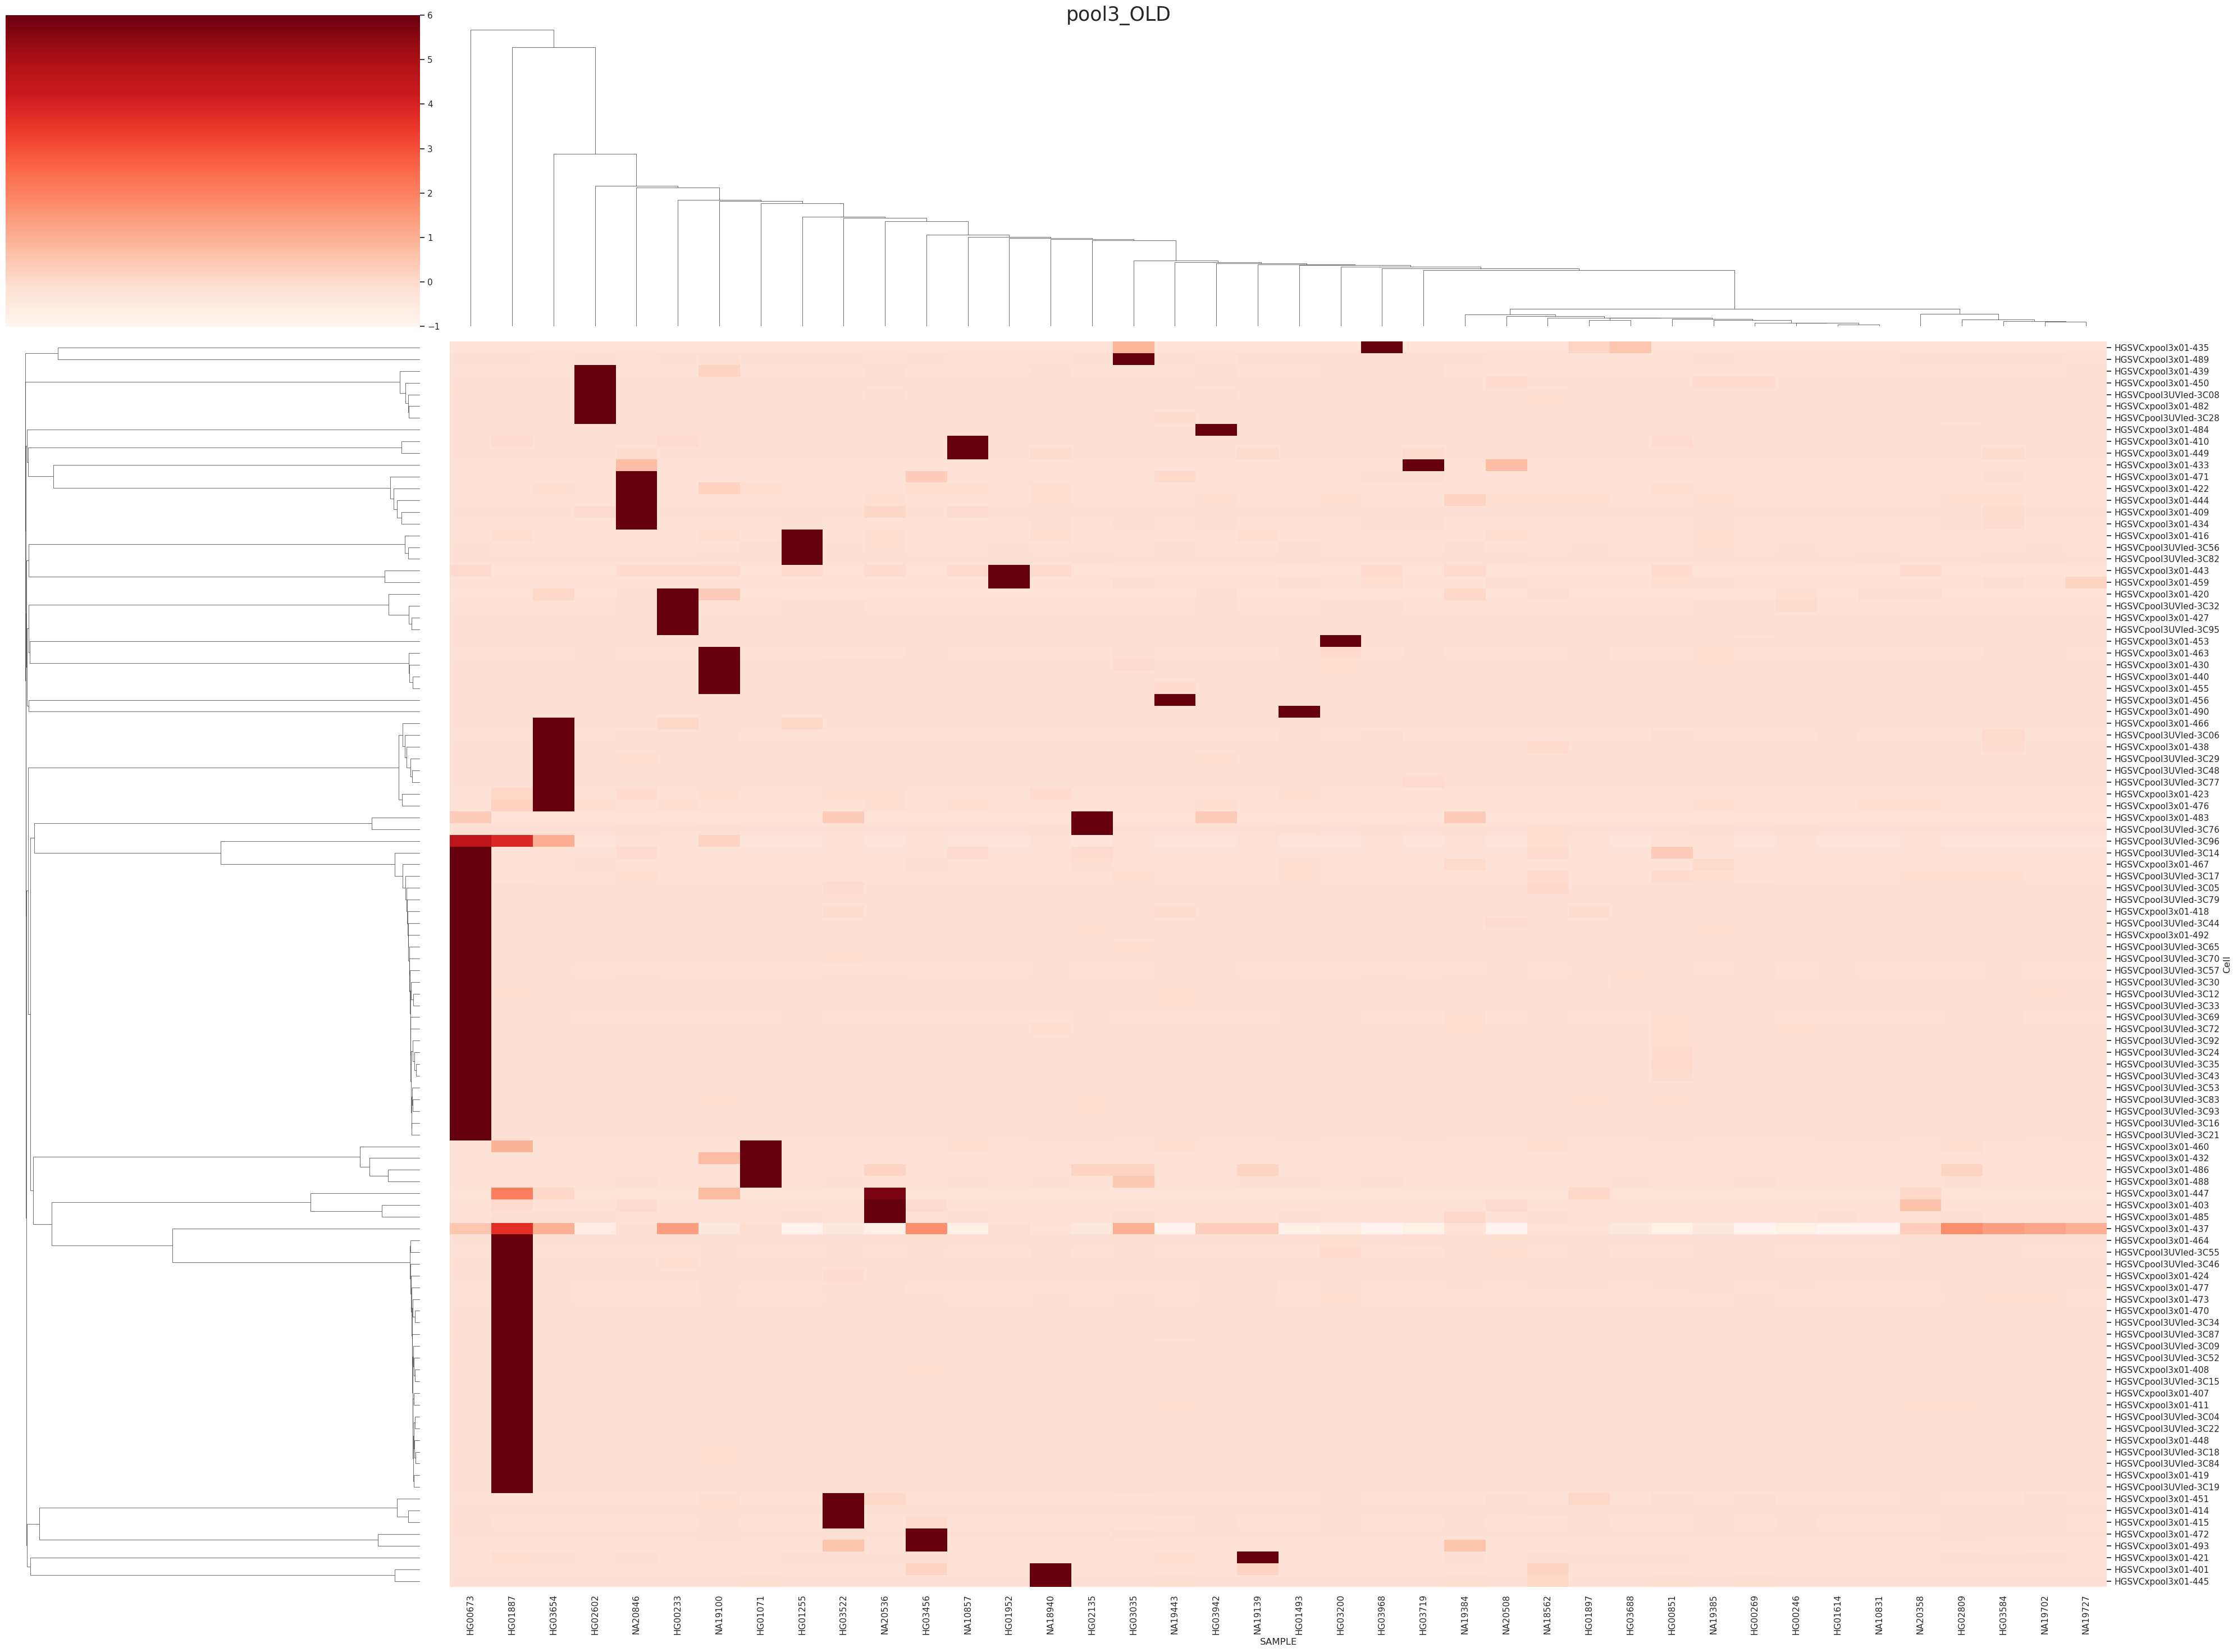

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# Assuming pivot_table_stats_zscore is your data
# Assuming df is your data frame and it's properly formatted with numeric values only

# Create the clustermap
cg = sns.clustermap(df, cmap="Reds", vmin=-1, vmax=6, figsize=(40, 30))

# Increase the figure size to make space for all labels if necessary
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=90)
plt.setp(cg.ax_heatmap.get_yticklabels(), rotation=0)

# We will need to draw the canvas to recompute the correct positions
plt.gcf().canvas.draw()

# Get the tick labels and set them again to make sure all are displayed
xtl = [item.get_text() for item in cg.ax_heatmap.get_xticklabels()]
ytl = [item.get_text() for item in cg.ax_heatmap.get_yticklabels()]

cg.ax_heatmap.set_xticklabels(xtl, rotation=90, ha='center', minor=False)
cg.ax_heatmap.set_yticklabels(ytl, rotation=0,   minor=False)
cg.ax_heatmap.figure.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9)


cg.fig.suptitle(f'{k}', fontsize=25)
# Adjust the subplot params to give some more space for the tick labels
#plt.subplots_adjust(right=0.85)

# Save the figure
output_file = f"{output_dir}/{k}/clustermap_zscore_cell_per_sample.png"
cg.savefig(output_file)
plt.tight_layout()
# Show the plot
plt.show()

# Set the x-tick labels manually

## Save the figure
#output_file = f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample.png"
##ax.savefig(output_file)
#
##ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
##ax.set_xlabel("Sample")
##ax.set_ylabel("Cell Line")
#ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/clustermap_zscore_cell_per_sample.png")
#ax

In [30]:

# Rpy2

%load_ext rpy2.ipython 




In [31]:
df

SAMPLE,HG00233,HG00246,HG00269,HG00673,HG00851,HG01071,HG01255,HG01493,HG01614,HG01887,...,NA19139,NA19384,NA19385,NA19443,NA19702,NA19727,NA20358,NA20508,NA20536,NA20846
Cell,,,,,,,,,,,,,,,,,,,,,
HGSVCxpool3x01-401,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,...,0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311,-0.188311
HGSVCxpool3x01-403,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.041840,...,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,-0.193986,0.566745,-0.041840,6.196156,-0.041840
HGSVCxpool3x01-407,-0.172144,-0.140845,-0.140845,-0.172144,-0.172144,-0.172144,-0.140845,-0.172144,-0.172144,6.244139,...,-0.172144,-0.109546,-0.172144,-0.140845,-0.172144,-0.172144,-0.140845,-0.140845,-0.172144,-0.172144
HGSVCxpool3x01-408,-0.175845,-0.175845,-0.154659,-0.175845,-0.175845,-0.154659,-0.175845,-0.175845,-0.175845,6.243546,...,-0.154659,-0.154659,-0.175845,-0.112286,-0.175845,-0.175845,-0.175845,-0.175845,-0.154659,-0.112286
HGSVCxpool3x01-409,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,...,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,-0.178543,0.112956,6.234444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HGSVCpool3UVled-3C87,-0.141718,-0.172865,-0.172865,-0.110571,-0.172865,-0.172865,-0.172865,-0.172865,-0.172865,6.243374,...,-0.172865,-0.172865,-0.172865,-0.172865,-0.141718,-0.172865,-0.172865,-0.172865,-0.172865,-0.110571
HGSVCpool3UVled-3C92,-0.176919,-0.176919,-0.176919,6.242265,-0.051667,-0.176919,-0.114293,-0.176919,-0.176919,-0.145606,...,-0.176919,-0.176919,-0.082980,-0.176919,-0.145606,-0.145606,-0.176919,-0.145606,-0.176919,-0.145606
HGSVCpool3UVled-3C93,-0.172250,-0.172250,-0.140644,6.243654,-0.109039,-0.172250,-0.140644,-0.172250,-0.140644,-0.172250,...,-0.172250,-0.140644,-0.172250,-0.172250,-0.172250,-0.172250,-0.140644,-0.140644,-0.172250,-0.140644


In [32]:
ref_count_merged = list()
for e in d[k]:
    tmp_df = pd.read_csv(f"{pool_results_folder}/{e}/reference_file_SNP_counts.tsv",sep="\t").drop(["Unnamed: 0"], axis=1)
    ref_count_merged.append(tmp_df)

ref_count = pd.concat(ref_count_merged)
ref_count

,GlobalSample,SAMPLE,ID
0,HGSVCxpool3x01,HG00233,83089
1,HGSVCxpool3x01,HG00246,79597
2,HGSVCxpool3x01,HG00269,91333
3,HGSVCxpool3x01,HG00673,111467
4,HGSVCxpool3x01,HG00851,105697
...,...,...,...
35,HGSVCpool3UVled,NA19727,94120
36,HGSVCpool3UVled,NA20358,240036
37,HGSVCpool3UVled,NA20508,85073
38,HGSVCpool3UVled,NA20536,76687


In [33]:
pool_df = pd.DataFrame([[e.split("-")[0], e] for e in df.index], columns=["PoolID", "cell"])
pool_df

,PoolID,cell
0,HGSVCxpool3x01,HGSVCxpool3x01-401
1,HGSVCxpool3x01,HGSVCxpool3x01-403
2,HGSVCxpool3x01,HGSVCxpool3x01-407
3,HGSVCxpool3x01,HGSVCxpool3x01-408
4,HGSVCxpool3x01,HGSVCxpool3x01-409
...,...,...
101,HGSVCpool3UVled,HGSVCpool3UVled-3C87
102,HGSVCpool3UVled,HGSVCpool3UVled-3C92
103,HGSVCpool3UVled,HGSVCpool3UVled-3C93
104,HGSVCpool3UVled,HGSVCpool3UVled-3C95


In [34]:
pool_df.PoolID.unique()

array(['HGSVCxpool3x01', 'HGSVCpool3UVled'], dtype=object)

In [35]:
ref_count.GlobalSample.unique()

array(['HGSVCxpool3x01', 'HGSVCpool3UVled'], dtype=object)

In [36]:
%%R -i output_dir -i k  -i df -i metadata -i ref_count -i pool_df -w 2000 -h 1500
library(ComplexHeatmap)
library(circlize)
library(RColorBrewer)

set.seed(123) # for reproducibility
ordered_metadata <- metadata[match(colnames(df), metadata$SampleID), ]

# Map GlobalSample to the SAMPLE in pivot_table_stats_zscore
global_sample_annotation <- ref_count[match(colnames(df), ref_count$SAMPLE), "GlobalSample"]
ref_count

# Hex color codes provided by you
superpopulation_colors_hex <- c(
  "AFR" = "#3274A1",
  "AMR" = "#E1812C",
  "EAS" = "#EEBB89",
  "EUR" = "#B5C8E1",
  "SAS" = "#3A923A"
)


# Create a named vector to map cells to PoolID from pool_df
pool_annotation_vector <- setNames(pool_df$PoolID, pool_df$cell)

# Then, map each row name of the matrix to its PoolID
row_pool_annotation <- pool_annotation_vector[rownames(df)]

# Assuming pool_df is your data frame with PoolID
unique_pool_ids <- unique(pool_df$PoolID[!is.na(pool_df$PoolID)])  # Exclude NA values

# Generate colors
n_colors <- length(unique_pool_ids)
pool_colors <- colorRampPalette(brewer.pal(9, "Set1"))(n_colors)

names(pool_colors) <- unique_pool_ids

print(pool_colors)

# Prepare the pool_annotation with a named vector of colors
pool_annotation <- HeatmapAnnotation(
  PoolID = row_pool_annotation,
  col = list(PoolID = pool_colors),  # Ensure pool_colors is a named vector
    which="row",
  annotation_legend_param = list(
    PoolID = list(
      title = "Pool ID",  # Add title for the legend
      title_gp = gpar(fontsize = 16, fontface = "bold"),
      labels_gp = gpar(fontsize = 16)
    )
  )
)
print(pool_annotation)

# Assuming ordered_metadata is your metadata dataframe which has a column 'Superpopulation'

# Check if all superpopulations in your data are covered by the colors defined
if(!all(unique(ordered_metadata$Superpopulation) %in% names(superpopulation_colors_hex))) {
  stop("Not all superpopulations have a defined color")
}


# Generate distinct colors for each unique Population
unique_populations <- unique(ordered_metadata$Population)
population_colors <- RColorBrewer::brewer.pal(n = min(length(unique_populations), 9), name = "Set3")  # "Set3" is another palette suitable for categorical data
if (length(unique_populations) > 9) {
  population_colors <- colorRampPalette(RColorBrewer::brewer.pal(9, "Set3"))(length(unique_populations))
}
names(population_colors) <- unique_populations


# Create HeatmapAnnotation objects with the new colors
col_annotation <- HeatmapAnnotation(
  df = ordered_metadata[c("Population", "Superpopulation")],
  col = list(
    Population = population_colors,  # Apply the color mapping for Population
    Superpopulation = superpopulation_colors_hex  # Apply the color mapping
      
      
  ), 
  annotation_legend_param = list(
    Population = list( 
      title_gp = gpar(fontsize = 16, 
                      fontface = "bold"), 
      labels_gp = gpar(fontsize = 16)),
    Superpopulation = list( 
      title_gp = gpar(fontsize = 16,
                      fontface = "bold"), 
      labels_gp = gpar(fontsize = 16)))
   # pool = list( 
   #   title_gp = gpar(fontsize = 16,
   #                   fontface = "bold"), 
   #   labels_gp = gpar(fontsize = 16))
#  GlobalSample = global_sample_annotation  # Assuming global_sample_annotation is previously defined
)

# Convert the pandas DataFrame to an R matrix
mat <- as.matrix(df)
#print(head(mat))

#file_path <- paste(output_dir, sample_for_savedir, "clustermap_zscore_cell_per_sample_with_annotations.png", sep="/")
#png(file_path, width = 1800, height = 1500)

file_path <- paste(output_dir, k, "clustermap_zscore_cell_per_sample_with_annotations.png", sep="/")
png(file_path, width = 2000, height = 1500)

# Creating the heatmap
ht <- Heatmap(mat, 
        name = "z-score", 
        col = colorRamp2(c(-1, 6), c("white", "red")),
        top_annotation = col_annotation,
        right_annotation = pool_annotation, # Add pool annotation here
        cluster_rows = TRUE, 
        cluster_columns = TRUE,
        show_row_names = TRUE,
        show_column_names = TRUE,
              column_title=k,  column_title_gp = gpar(fontsize = 20),
       row_names_gp = gpar(fontsize = 6)) # Adjust fontsize as needed
              heatmap_legend_param = list(
                title_gp = gpar(fontsize = 14), # Adjust the title font size
                labels_gp = gpar(fontsize = 12), # Adjust the labels font size
                ncol = 1 # Use a single column for the legend items
              )

    
   


# Drawing the heatmap with the custom legend parameters
#draw(ht, heatmap_legend_list = legend_param)
draw(ht, heatmap_legend_side="left", annotation_legend_side="right",
           legend_grouping = "original")
dev.off()

/g/korbel2/weber/miniconda3/envs/notebook/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
R[write to console]: Loading required package: grid



R[write to console]: ========================================
ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




 HGSVCxpool3x01 

HGSVCpool3UVled 

      "#E41A1C" 

      "#999999" 

A HeatmapAnnotation object with 1 annotation


  name:

heatmap_annotation_0

  position:

row

  items:

106

  width:

5mm

  height:

1npc

  this object is 

subsettable


13.4925666666667mm

extension on the

bottom

   name

 annotation_type

 color_mapping

 width

 PoolID

 discrete vector

  user-defined

   5mm

png 

  2 